In [5]:
import os, sys
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import awswrangler as wr

In [6]:
utils_path = os.path.join('/home/ec2-user/SageMaker/thinktank_casestudy/src/utils/')
pp_path = os.path.join('/home/ec2-user/SageMaker/thinktank_casestudy/src/preprocessing/')

sys.path.append(utils_path)
sys.path.append(pp_path)

In [7]:
from utils import *
from preprocessing import *

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [10]:
path_prefix = 's3://think-tank-casestudy/preprocessed_data/n_cluster_4000'

In [11]:
train_data = wr.s3.read_parquet(f'{path_prefix}/train_data_clustered.parquet')

In [12]:
test_data = wr.s3.read_parquet(f'{path_prefix}/test_data_clustered.parquet')

In [13]:
train_data.groupby('ORIGIN_STAND', 
                   as_index=False)[['TOTAL_FLIGHT_TIME_MINUTES', 
                'TOTAL_DISTANCE_KM']].agg(['mean', 'median','std','max','min'])

ORIGIN_STAND TOTAL_FLIGHT_TIME_MINUTES                                \
                                     mean median       std    max   min   
0           1.0                  9.513317   9.00  4.055926  20.50  2.25   
1           2.0                  9.566489   8.75  4.496830  20.50  2.25   
2           3.0                  9.542165   8.75  4.060391  20.50  2.25   
3           4.0                 10.078436   9.75  3.966775  20.50  2.25   
4           5.0                  8.121795   8.25  3.075194  17.75  2.75   
..          ...                       ...    ...       ...    ...   ...   
58         59.0                 11.635677  11.50  3.823871  20.50  2.25   
59         60.0                  8.605748   8.00  3.907847  20.50  2.25   
60         61.0                  8.939262   8.25  4.026630  20.50  2.25   
61         62.0                  8.103208   7.00  4.131335  20.50  2.25   
62         63.0                  9.070925   8.25  3.778756  20.50  2.25   

   TOTAL_DISTANCE_KM                                          
                mean    median       std       max       min  
0           3.133964  3.020737  1.619171  8.179978  0.004465  
1           2.258462  1.819555  1.691297  8.159988  0.000990  
2           3.781689  3.280929  1.930065  8.159196  0.005004  
3           2.632164  1.961713  1.716968  8.166468  0.048225  
4           3.603324  3.326837  2.045915  7.885870  0.774378  
..               ...       ...       ...       ...       ...  
58          3.803987  3.710210  1.479838  8.190655  0.002217  
59          2.880432  2.409767  1.805230  8.189453  0.001979  
60          2.864591  2.517841  1.651406  8.184955  0.000000  
61          2.767747  2.369340  1.567340  8.076172  0.005381  
62          2.305258  1.814040  1.407915  8.188918  0.000000  

[63 rows x 11 columns]

In [14]:
train_data.groupby('CALL_TYPE', 
                   as_index=False)[['TOTAL_FLIGHT_TIME_MINUTES', 
                'TOTAL_DISTANCE_KM']].agg(['mean', 'median','std','max','min'])

CALL_TYPE TOTAL_FLIGHT_TIME_MINUTES                               \
                                 mean median       std   max   min   
0         A                 10.456125   10.0  4.190134  20.5  2.25   
1         B                  9.611950    9.0  3.987264  20.5  2.25   
2         C                  9.566785    9.0  4.197024  20.5  2.25   

  TOTAL_DISTANCE_KM                                     
               mean    median       std       max  min  
0          3.158785  2.845536  1.855836  8.191437  0.0  
1          3.108261  2.767805  1.747787  8.191326  0.0  
2          3.171706  2.805640  1.924201  8.191482  0.0

In [15]:
train_data.groupby('WEATHER', as_index=False)[['TOTAL_FLIGHT_TIME_MINUTES', 'TOTAL_DISTANCE_KM']]\
.agg(['mean', 'median','std','max','min'])

WEATHER TOTAL_FLIGHT_TIME_MINUTES                               \
                               mean median       std   max   min   
0  Cloudy                  9.789449   9.25  4.102885  20.5  2.25   
1   Foggy                  9.770298   9.25  4.100735  20.5  2.25   
2   Rainy                  9.787381   9.25  4.106448  20.5  2.25   
3   Sunny                  9.779296   9.25  4.110415  20.5  2.25   
4   Windy                  9.790107   9.25  4.106708  20.5  2.25   

  TOTAL_DISTANCE_KM                                     
               mean    median       std       max  min  
0          3.138360  2.794055  1.823215  8.191454  0.0  
1          3.135225  2.793019  1.821891  8.191482  0.0  
2          3.131932  2.789794  1.815255  8.191218  0.0  
3          3.136941  2.792271  1.822470  8.191316  0.0  
4          3.140490  2.799794  1.823973  8.191463  0.0

In [18]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'C'

In [20]:
train_data = extend_timestamps(train_data)
test_data = extend_timestamps(test_data)

In [21]:
vc_year_month = train_data.YEAR_MONTH.value_counts().sort_index()

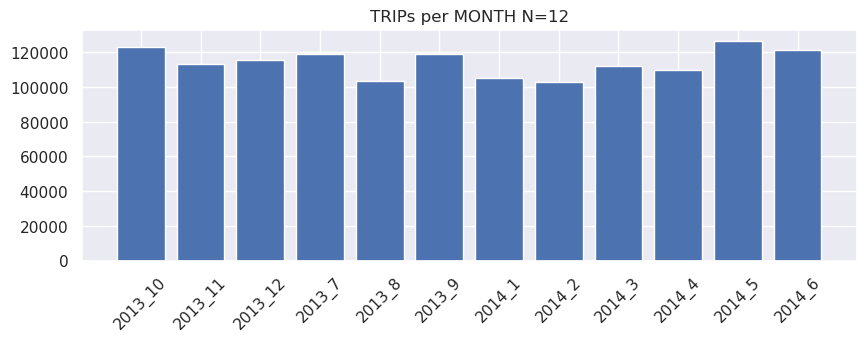

In [22]:
sns.set()
plt.figure(figsize=(10,3))
plt.bar(vc_year_month.index, vc_year_month.values,label='Unique TRIPs per Month')
plt.xticks(vc_year_month.index, rotation=45)
plt.title(f'TRIPs per MONTH N={vc_year_month.shape[0]}')
plt.show()

In [24]:
train_data

TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
0        1372636858620000589         C          NaN           NaN  20000589   
1        1372637303620000596         B          NaN           7.0  20000596   
2        1372636951620000320         C          NaN           NaN  20000320   
3        1372636854620000520         C          NaN           NaN  20000520   
4        1372637091620000337         C          NaN           NaN  20000337   
...                      ...       ...          ...           ...       ...   
1371130  1404164723620000332         B          NaN          15.0  20000332   
1371131  1404171463620000698         C          NaN           NaN  20000698   
1371132  1404171367620000670         C          NaN           NaN  20000670   
1371133  1404141826620000248         B          NaN          12.0  20000248   
1371134  1404157147620000079         B          NaN          34.0  20000079   

        WEATHER        TIMESTAMP_DT  N_COORDINATE_POINTS  \
0         Rainy 2013-07-01 00:00:58                   23   
1         Foggy 2013-07-01 00:08:23                   19   
2         Rainy 2013-07-01 00:02:31                   65   
3        Cloudy 2013-07-01 00:00:54                   43   
4         Windy 2013-07-01 00:04:51                   29   
...         ...                 ...                  ...   
1371130   Windy 2014-06-30 21:45:23                   33   
1371131  Cloudy 2014-06-30 23:37:43                   32   
1371132   Windy 2014-06-30 23:36:07                   30   
1371133   Sunny 2014-06-30 15:23:46                   62   
1371134   Sunny 2014-06-30 19:39:07                   27   

         TOTAL_FLIGHT_TIME_MINUTES             START_POINT  ...  \
0                             5.50  [-8.618643, 41.141412]  ...   
1                             4.50  [-8.639847, 41.159826]  ...   
2                            16.00  [-8.612964, 41.140359]  ...   
3                            10.50  [-8.574678, 41.151951]  ...   
4                             7.00   [-8.645994, 41.18049]  ...   
...                            ...                     ...  ...   
1371130                       8.00  [-8.585703, 41.148567]  ...   
1371131                       7.75   [-8.612469, 41.14602]  ...   
1371132                       7.25  [-8.610138, 41.140845]  ...   
1371133                      15.25  [-8.630712, 41.154885]  ...   
1371134                       6.50  [-8.615538, 41.140629]  ...   

        START_POINT_LAT  DEST_POINT_LON DEST_POINT_LAT  CLUSTER_LABEL  index  \
0             41.141412       -8.630838      41.154489            307    307   
1             41.159826       -8.665740      41.170671           2939   2939   
2             41.140359       -8.615970      41.140530           3613   3613   
3             41.151951       -8.607996      41.142915           2444   2444   
4             41.180490       -8.687268      41.178087           1084   1084   
...                 ...             ...            ...            ...    ...   
1371130       41.148567       -8.611713      41.171004           1062   1062   
1371131       41.146020       -8.611344      41.171013           1062   1062   
1371132       41.140845       -8.627454      41.158755           1189   1189   
1371133       41.154885       -8.587026      41.173524            754    754   
1371134       41.140629       -8.620893      41.149881            977    977   

         CENTER_LON  CENTER_LAT  TIMESTAMP_MONTH  TIMESTAMP_YEAR  YEAR_MONTH  
0         -8.630809   41.154479                7            2013      2013_7  
1         -8.665698   41.170555                7            2013      2013_7  
2         -8.615798   41.140600                7            2013      2013_7  
3         -8.608248   41.142927                7            2013      2013_7  
4         -8.688192   41.178231                7            2013      2013_7  
...             ...         ...              ...             ...         ...  
1371130   -8.611557   41.171086 

(-8.7, -8.5)

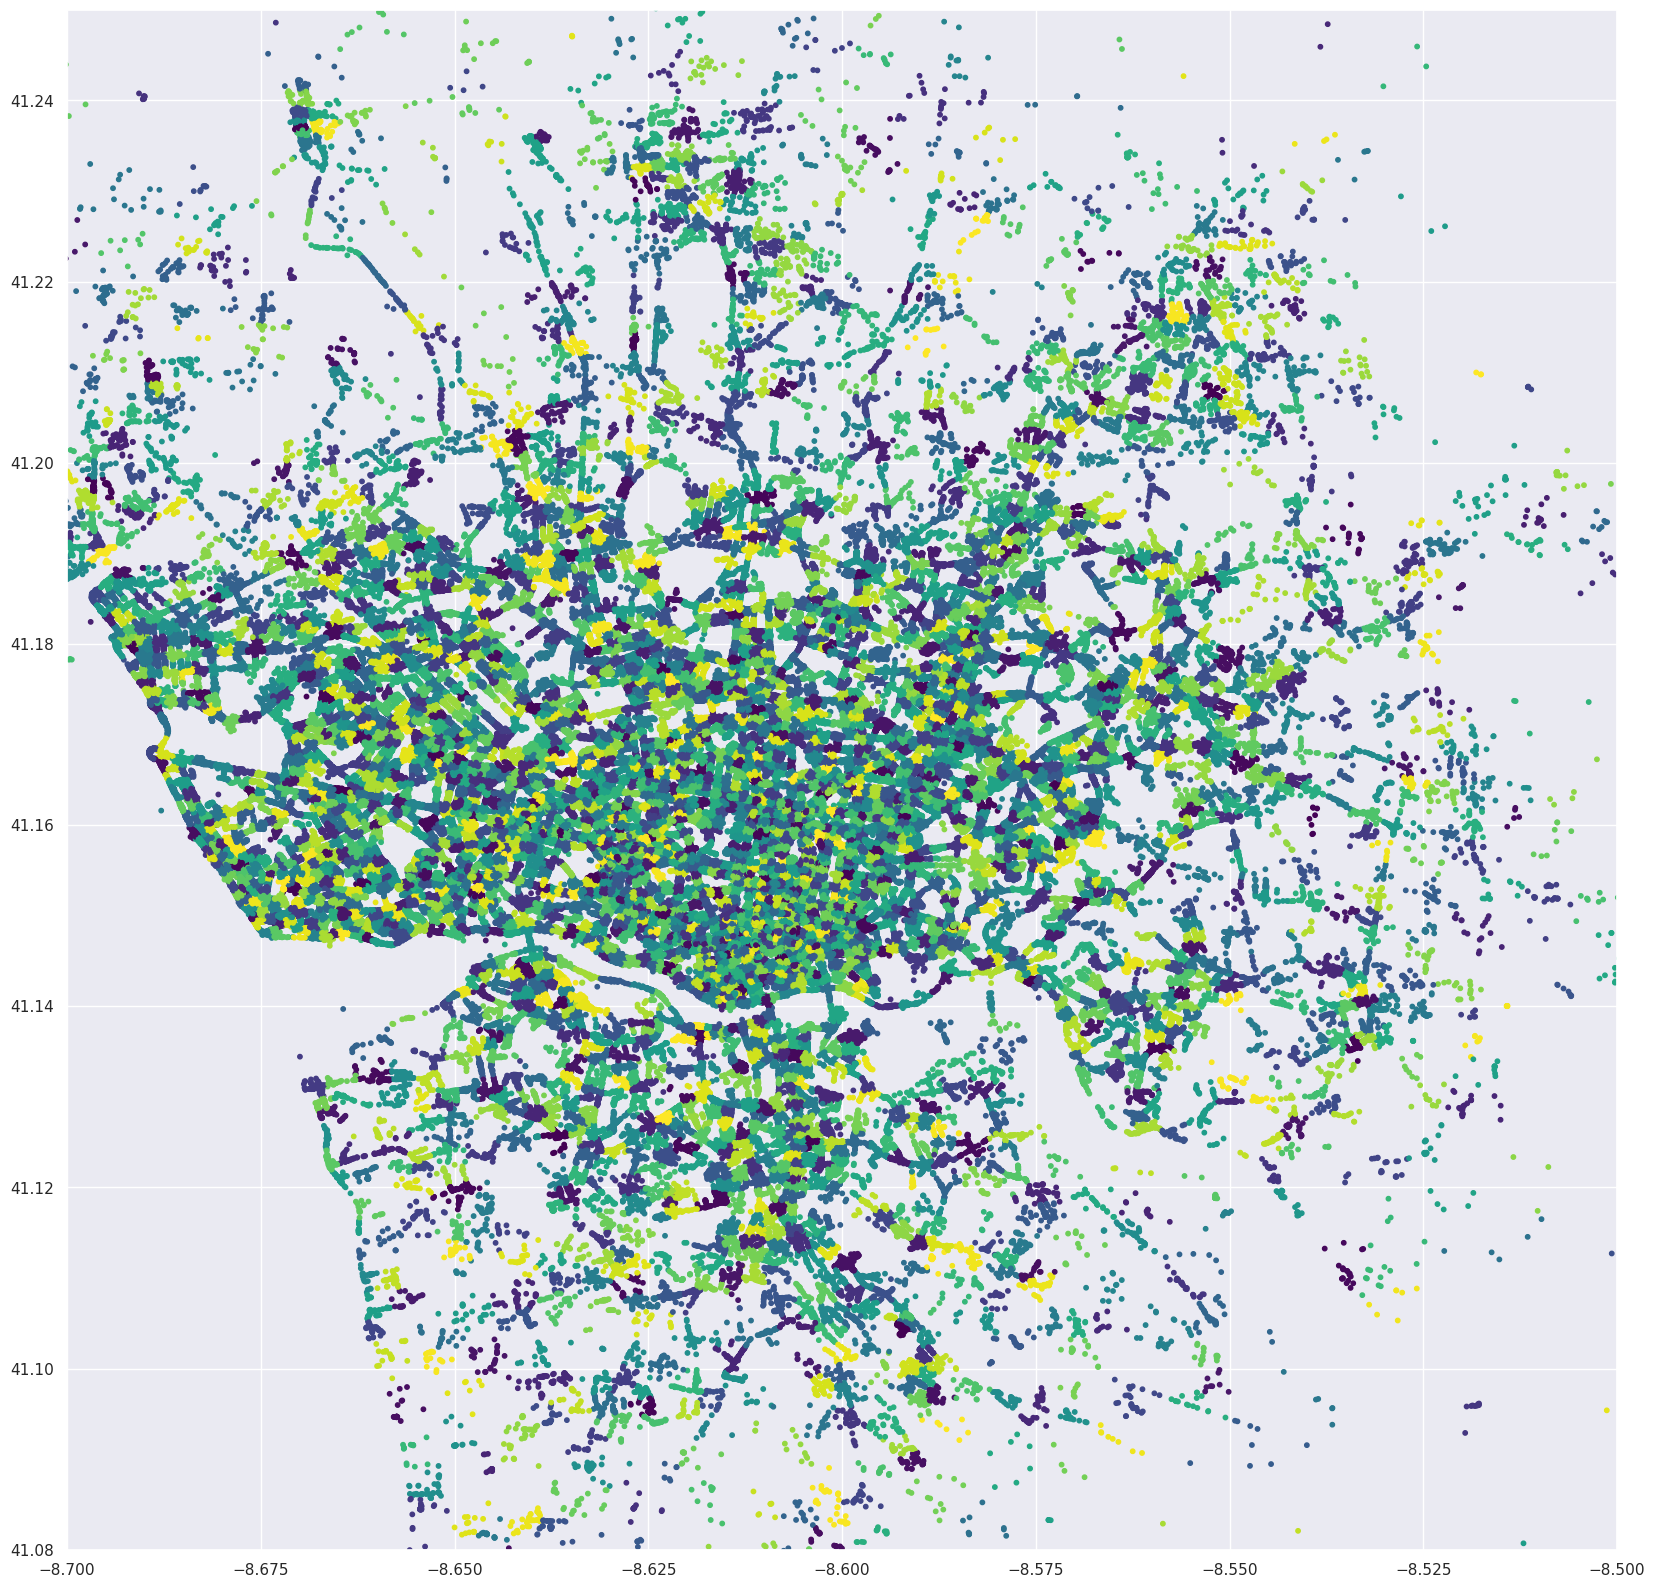

In [25]:
plt.figure(figsize=(20,20))
plt.scatter(train_data.DEST_POINT_LON, 
                        train_data.DEST_POINT_LAT,
            c=train_data.CLUSTER_LABEL, s=10,cmap='viridis')
plt.ylim([41.08,41.25])
plt.xlim([-8.7,-8.5])

In [27]:
train_data = split_lat_lon(train_data)

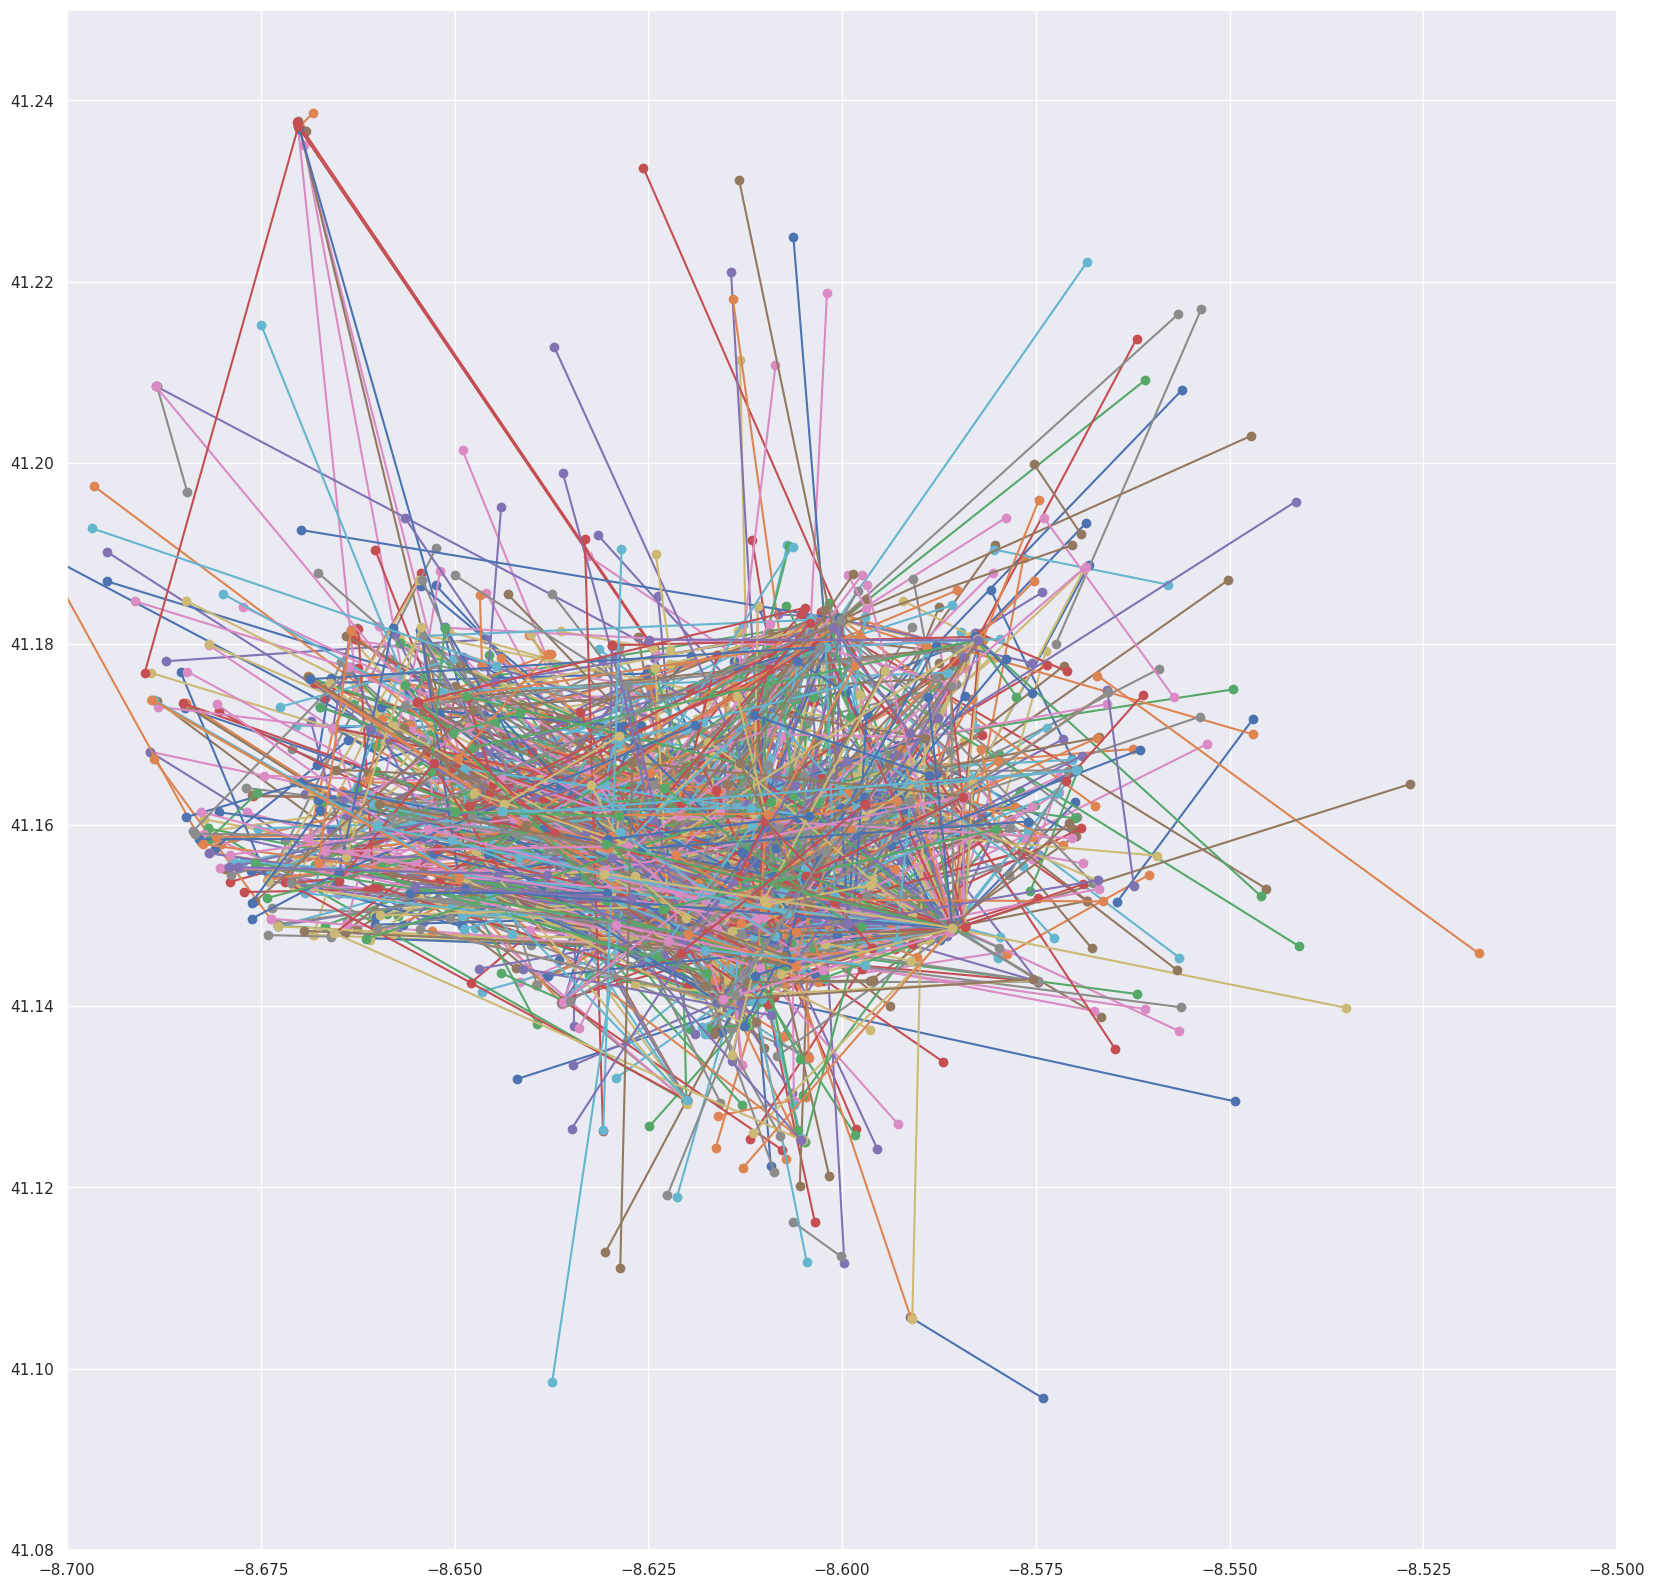

In [28]:
plt.figure(figsize=(20,20))
plt.ylim([41.08,41.25])
plt.xlim([-8.7,-8.5])
for index,row in train_data.iterrows():
    route = pd.DataFrame({'LON': [row.START_POINT_LON,row.DEST_POINT_LON],
                          'LAT': [row.START_POINT_LAT,row.DEST_POINT_LAT]})
    
    
    plt.plot(route.LON,route.LAT, '-o')
    if index == 2000:
        break
plt.show()

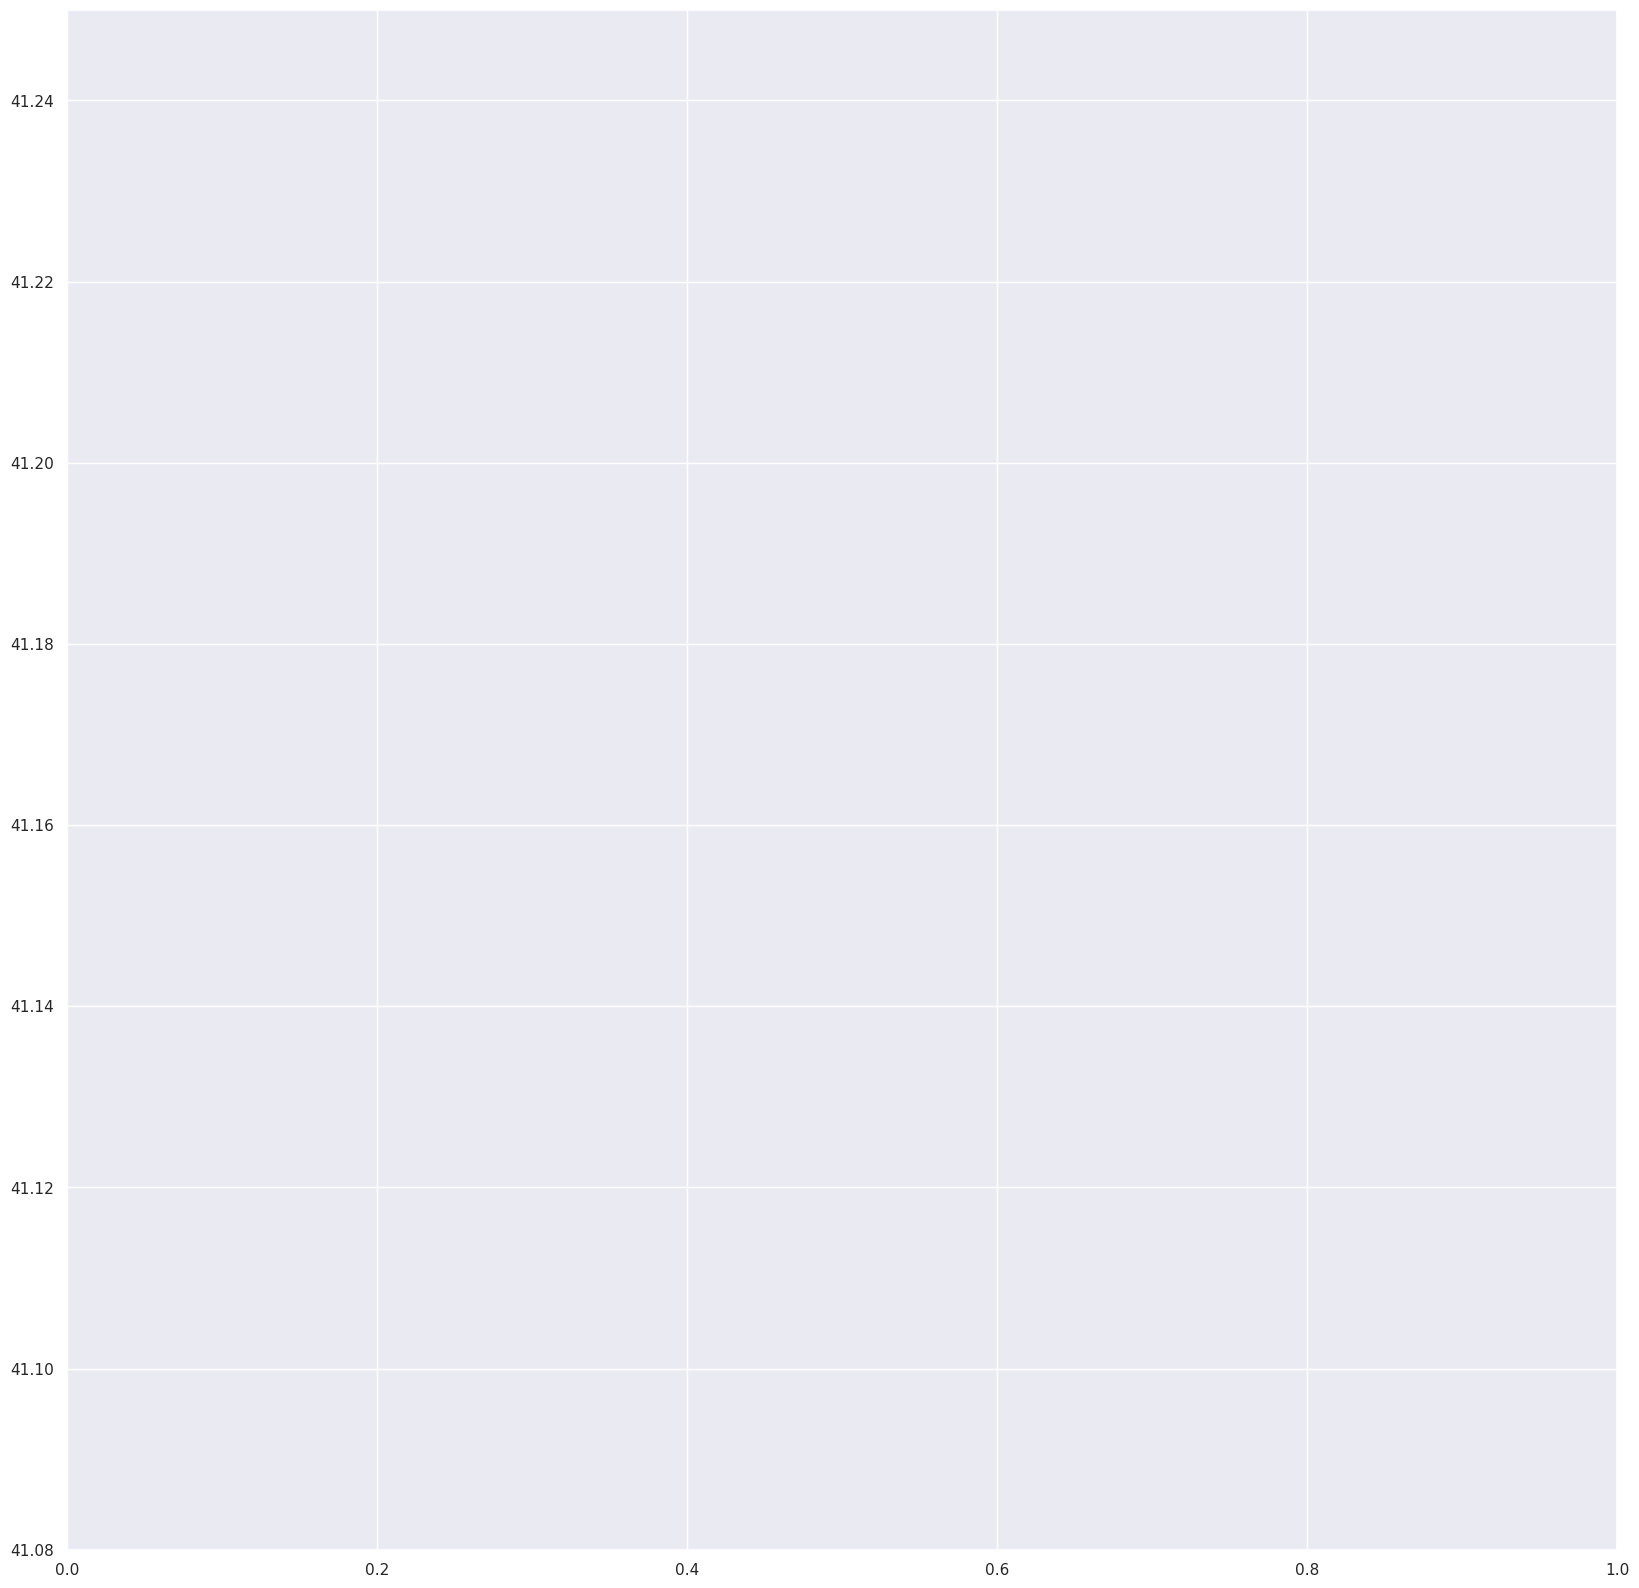

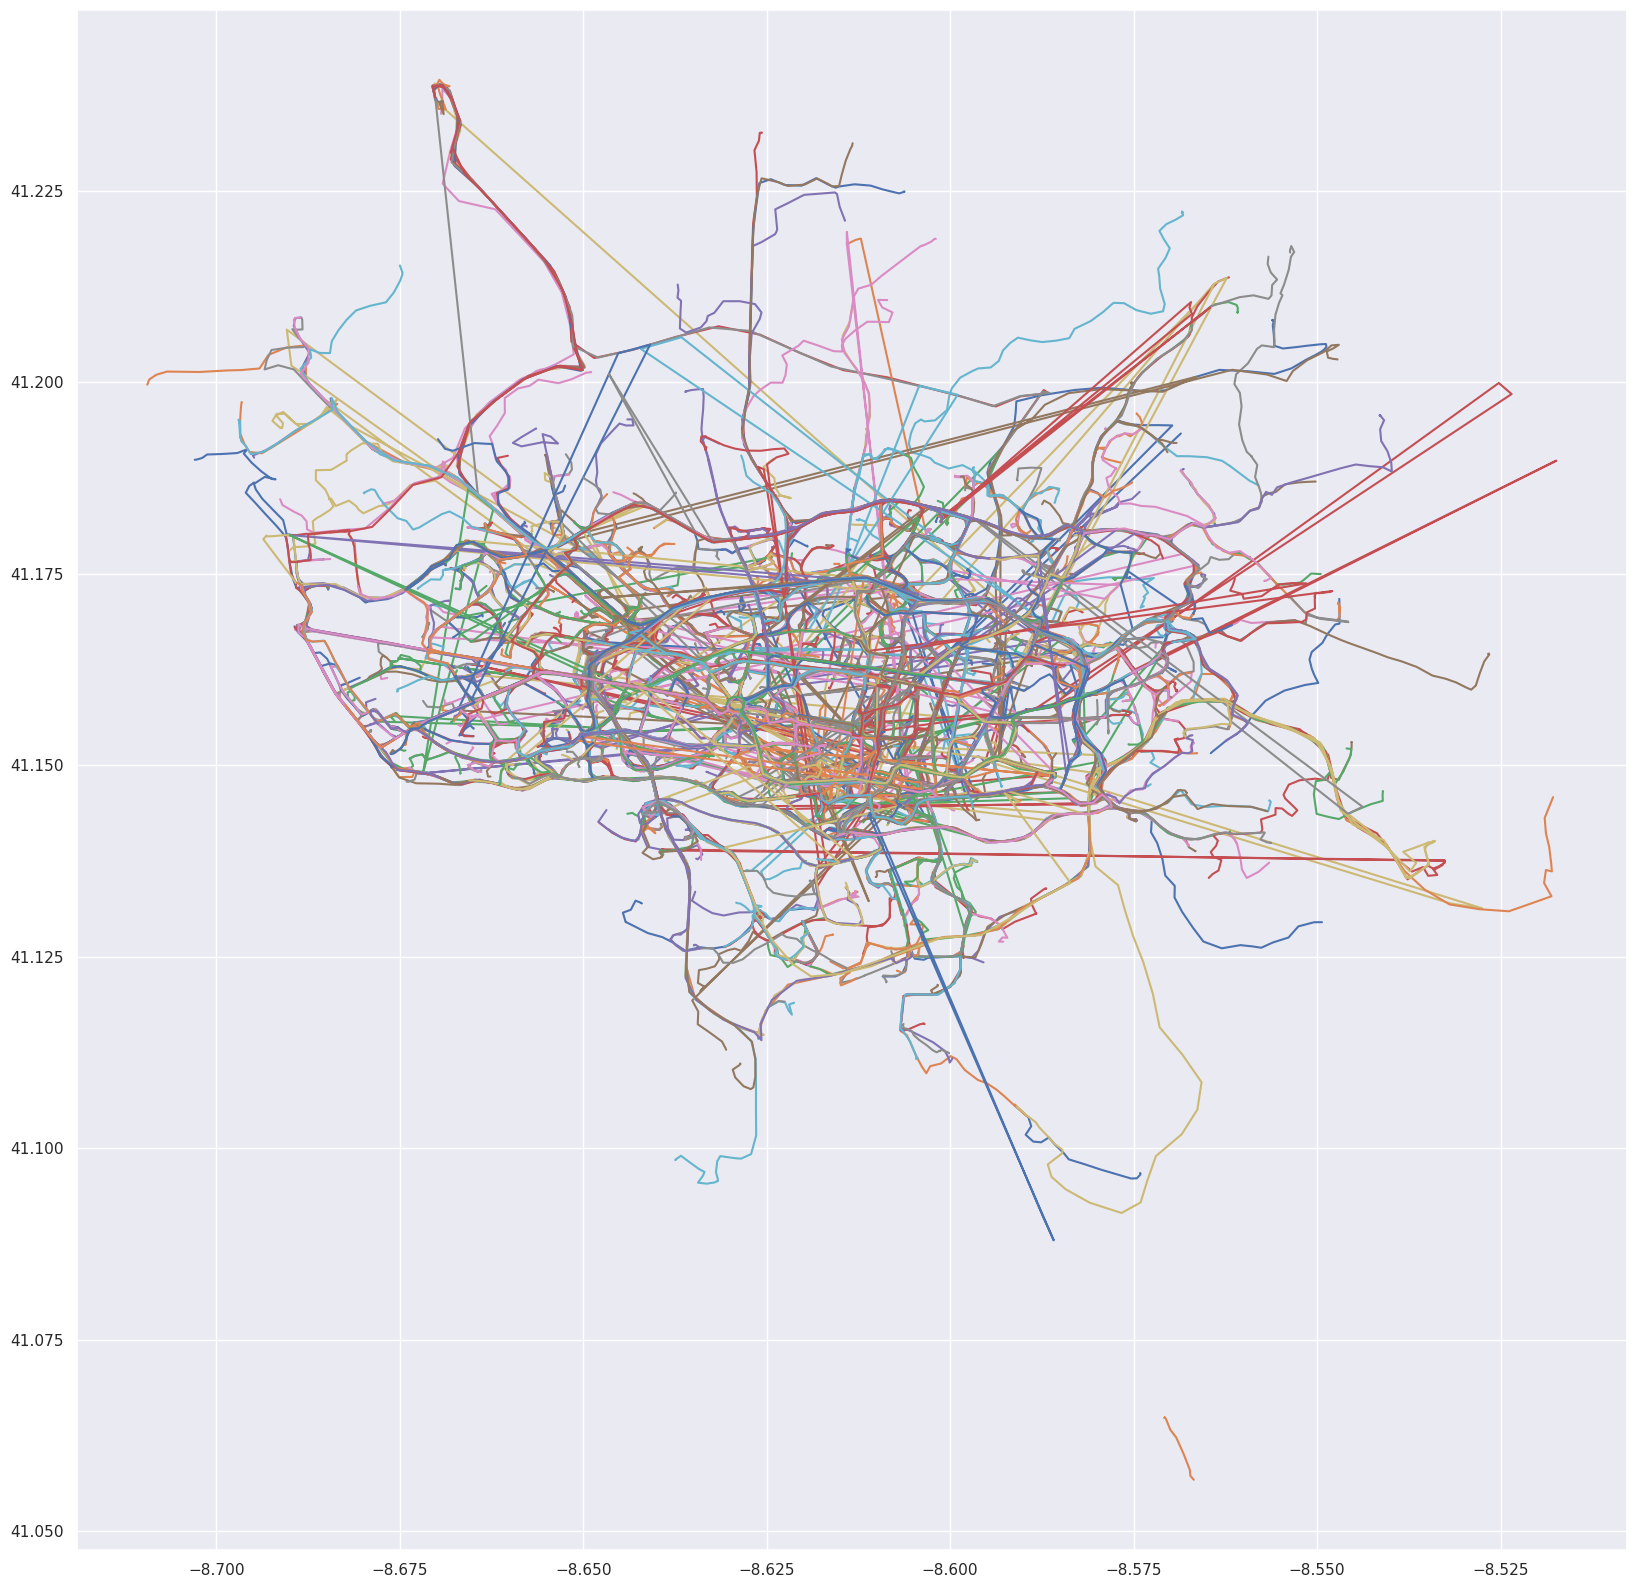

In [31]:
plt.figure(figsize=(20,20))
plt.ylim([41.08,41.25])
plt.figure(figsize=(20,20))

for index,row in train_data.iterrows():
    route = pd.DataFrame({'LON': train_data.LON_SEQUENCE[index],
                  'LAT': train_data.LAT_SEQUENCE[index]})
    plt.plot(route.LON,route.LAT)
    if index == 2000:
        break
plt.show()